<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

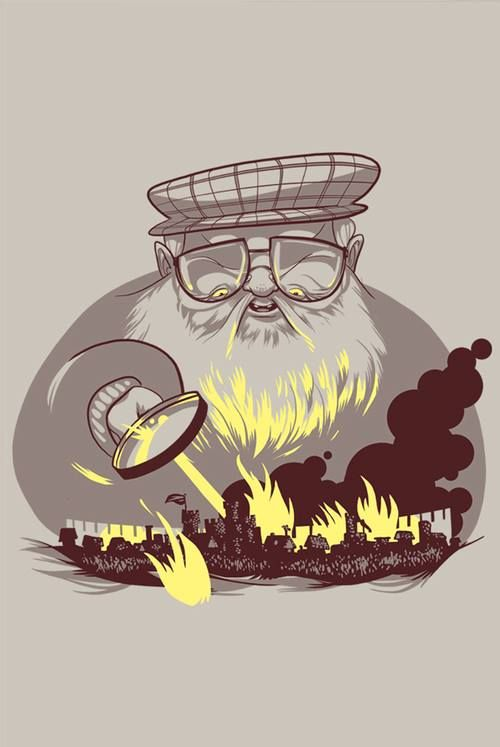

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
df = pd.read_csv('./game_of_thrones_train.csv', index_col='S.No')
df

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

Смотрим какая доля NaN'ов присутсвует в каждом столбце, и если больше 30%, то дропаем колонку, потому что восстанавливать не имеет смысла.

In [3]:
nan_count = df.isna().sum()
nan_percent = (nan_count / len(df)) * 100

nan_stats = pd.DataFrame({
    'Column': nan_count[nan_count > 0].index,
    'NaN Count': nan_count[nan_count > 0],
    'NaN Percent (%)': nan_percent[nan_count > 0]
})

nan_stats.reset_index(drop=True, inplace=True)
print(nan_stats)

columns_to_drop = nan_stats[nan_stats['NaN Percent (%)'] > 30]['Column']
print('Next columns will be dropped:\n', columns_to_drop.tolist())

df.drop(columns=columns_to_drop, inplace=True)
df

           Column  NaN Count  NaN Percent (%)
0           title        840        53.949904
1         culture       1069        68.657675
2     dateOfBirth       1278        82.080925
3          mother       1539        98.843931
4          father       1535        98.587026
5            heir       1536        98.651252
6           house        381        24.470135
7          spouse       1357        87.154785
8   isAliveMother       1539        98.843931
9   isAliveFather       1535        98.587026
10    isAliveHeir       1536        98.651252
11  isAliveSpouse       1357        87.154785
12            age       1278        82.080925
Next columns will be dropped:
 ['title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age']


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,
1,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,1,NaN,1,0,1,1,0,0,1,0,0.160535,1
1554,Masha Heddle,0,NaN,1,1,0,0,0,0,0,0,0.040134,0
1555,Matthos Seaworth,1,House Seaworth,0,1,1,1,1,0,0,0,0.076923,0


In [4]:
def make_categorial_statistics(df):
    non_numeric_columns = df.select_dtypes(exclude=['int', 'float'])
    unique_counts = non_numeric_columns.nunique()

    unique_counts_df = pd.DataFrame(unique_counts).reset_index()
    unique_counts_df.columns = ['Column', 'Unique Count']
    return unique_counts_df

df_categorial_statistics = make_categorial_statistics(df)
df_categorial_statistics

,Column,Unique Count
0,name,1557
1,house,315


Отбросим колонку name, так как она ничего в себе не несет, колонку house пока что отбросим, и не будет возвращать, если получим высокие результаты.
Также все булевы данные переведем в соответствующий тип

In [5]:
df.drop(columns=['name', 'house'], inplace=True)

bool_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isAlive']
df[bool_columns] = df[bool_columns].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              1557 non-null   bool   
 1   book1             1557 non-null   bool   
 2   book2             1557 non-null   bool   
 3   book3             1557 non-null   bool   
 4   book4             1557 non-null   bool   
 5   book5             1557 non-null   bool   
 6   isMarried         1557 non-null   bool   
 7   isNoble           1557 non-null   bool   
 8   numDeadRelations  1557 non-null   int64  
 9   popularity        1557 non-null   float64
 10  isAlive           1557 non-null   bool   
dtypes: bool(9), float64(1), int64(1)
memory usage: 50.2 KB


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [6]:
# # Подсказка
# cult = {
#     'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
#     'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
#     'Asshai': ["asshai'i", 'asshai'],
#     'Lysene': ['lysene', 'lyseni'],
#     'Andal': ['andal', 'andals'],
#     'Braavosi': ['braavosi', 'braavos'],
#     'Dornish': ['dornishmen', 'dorne', 'dornish'],
#     'Myrish': ['myr', 'myrish', 'myrmen'],
#     'Westermen': ['westermen', 'westerman', 'westerlands'],
#     'Westerosi': ['westeros', 'westerosi'],
#     'Stormlander': ['stormlands', 'stormlander'],
#     'Norvoshi': ['norvos', 'norvoshi'],
#     'Northmen': ['the north', 'northmen'],
#     'Free Folk': ['wildling', 'first men', 'free folk'],
#     'Qartheen': ['qartheen', 'qarth'],
#     'Reach': ['the reach', 'reach', 'reachmen'],
# }

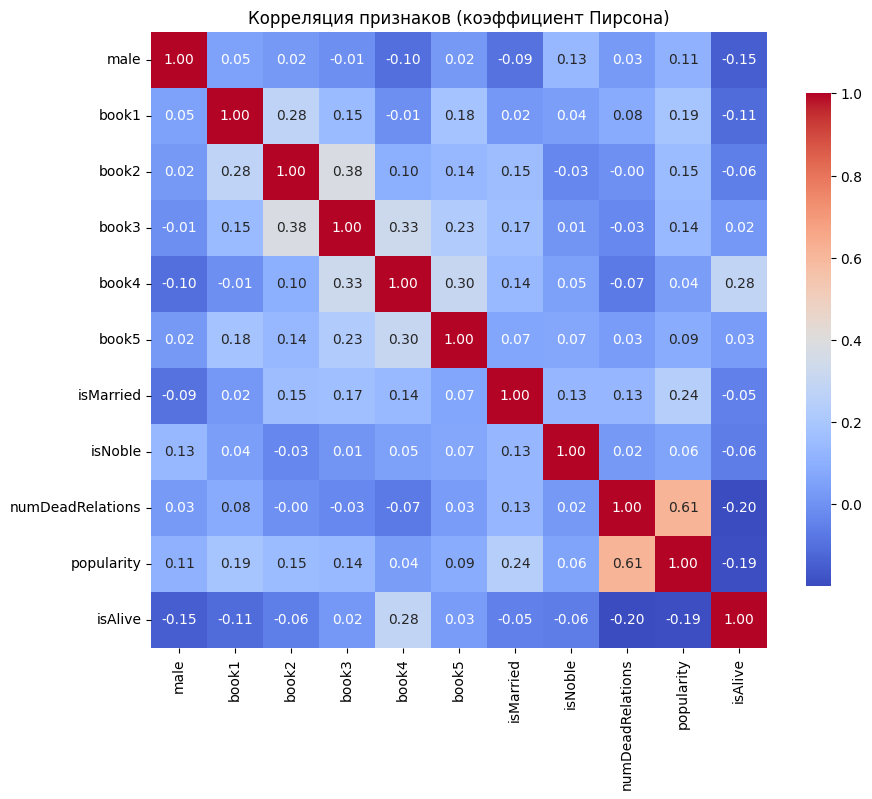

In [7]:
corr_df = df.copy(deep=True)
correlation_matrix = corr_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляция признаков (коэффициент Пирсона)')
plt.show()

<Figure size 1500x1500 with 0 Axes>

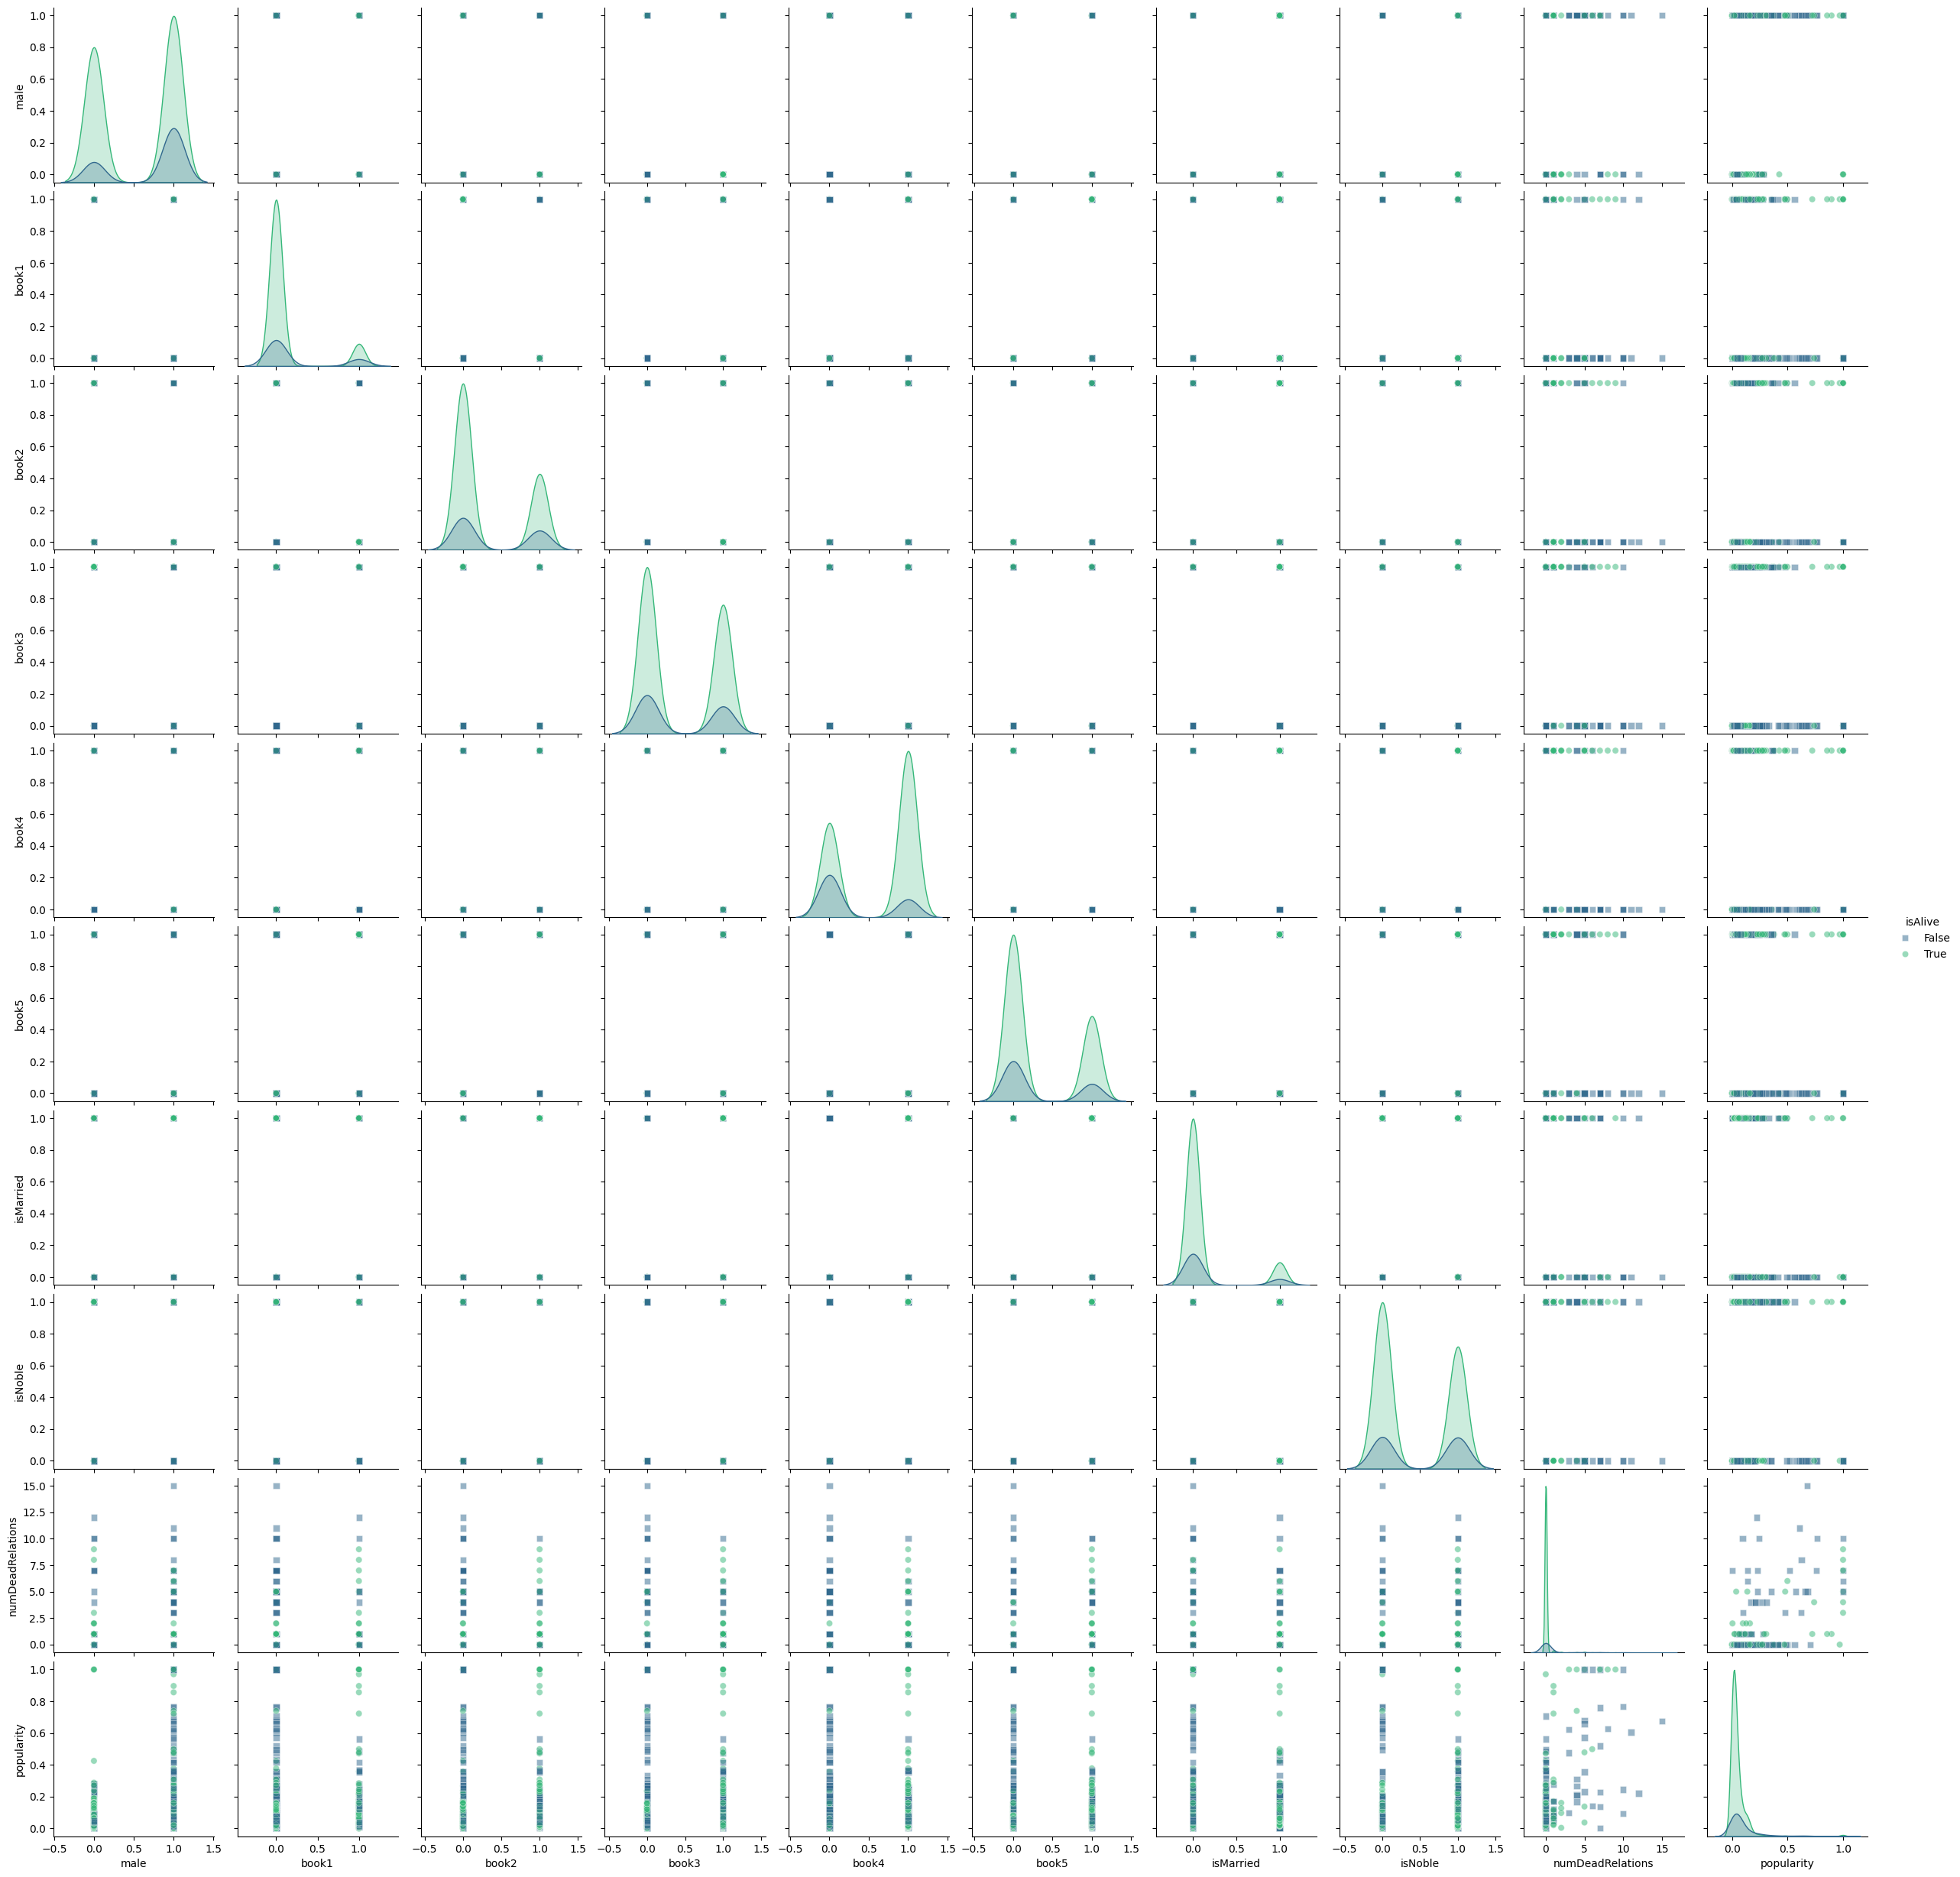

In [8]:
plt.figure(figsize=(15, 15))
pair_plot = sns.pairplot(df, hue='isAlive', palette='viridis', markers=['s', 'o'], plot_kws={'alpha': 0.5})
plt.show()

C:\Users\kuzga\AppData\Local\Temp\ipykernel_22212\1397944927.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


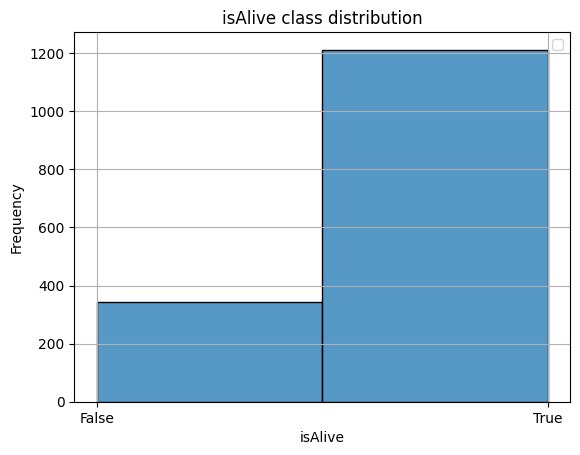

In [9]:
sns.histplot(df['isAlive'], bins=2, kde=False)
plt.title('isAlive class distribution')
plt.xlabel('isAlive')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])
plt.grid(True)
plt.legend()
plt.show()

Опять таки до пока что не будем удалть колонки с низкой корелляцией.

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [10]:
# ...

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [11]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [12]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [13]:
from sklearn.model_selection import train_test_split


X = df.drop(columns='isAlive')
y = df['isAlive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [14]:
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [27]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianProcessClassifier': GaussianProcessClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0)
}

param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'AdaBoostClassifier': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]},
    'GaussianProcessClassifier': {'max_iter_predict': [100, 200]},
    'GaussianNB': {},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'CatBoostClassifier': {'iterations': [50, 75, 100], 'learning_rate': [0.5, 0.1, 0.15], 'depth': [6, 8, 10, 12, 15]}
}

In [28]:
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Оценка на тестовой выборке
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Лучшие параметры для {model_name}: {grid_search.best_params_}")
    print(f"Точность на тестовых данных для {model_name}: {accuracy:.4f}\n")

# 4. Поиск лучшей модели
best_model_name = max(best_models, key=lambda model: accuracy_score(y_test, best_models[model].predict(X_test)))
best_model = best_models[best_model_name]
best_accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f"Лучшая модель: {best_model_name} с точностью {best_accuracy:.4f}")

Лучшие параметры для CatBoostClassifier: {'depth': 14, 'iterations': 75, 'learning_rate': 0.1}
Точность на тестовых данных для CatBoostClassifier: 0.8141

Лучшая модель: CatBoostClassifier с точностью 0.8141


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

Делаем тот же препроцессинг что и для train таблицы

In [24]:
X = pd.read_csv('./game_of_thrones_test.csv', index_col='S.No')

columns_to_drop = [
    'title',
    'culture',
    'dateOfBirth',
    'mother',
    'father',
    'heir',
    'spouse',
    'isAliveMother',
    'isAliveFather',
    'isAliveHeir',
    'isAliveSpouse',
    'age',

    'name',
    'house'
]
X.drop(columns=columns_to_drop, inplace=True)


bool_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble']
X[bool_columns] = X[bool_columns].astype(bool)

print(X.info())
X

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              389 non-null    bool   
 1   book1             389 non-null    bool   
 2   book2             389 non-null    bool   
 3   book3             389 non-null    bool   
 4   book4             389 non-null    bool   
 5   book5             389 non-null    bool   
 6   isMarried         389 non-null    bool   
 7   isNoble           389 non-null    bool   
 8   numDeadRelations  389 non-null    int64  
 9   popularity        389 non-null    float64
dtypes: bool(8), float64(1), int64(1)
memory usage: 12.2 KB
None


,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity
S.No,,,,,,,,,,
1558,False,False,False,False,False,True,False,False,0,0.050167
1559,False,False,True,True,True,True,False,False,0,0.745819
1560,False,False,False,True,True,False,False,False,0,0.010033
1561,True,True,True,True,True,True,False,True,0,0.220736
1562,True,True,True,True,True,True,True,False,0,0.434783
...,...,...,...,...,...,...,...,...,...,...
1942,True,True,True,True,True,True,False,False,0,0.351171
1943,True,False,True,False,True,True,False,False,0,0.096990
1944,True,True,True,True,True,True,False,False,0,0.030100


Получаем предсказанные метки классов на лучшей модели

In [25]:
predictions = best_model.predict(X).astype(int)
submission = pd.DataFrame({
    'S.No': X.index,
    'isAlive': predictions
})

submission.set_index('S.No', inplace=True)
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [26]:
submission.to_csv("./new_submission.csv", index=False)